### Step 0: Imports and Reading Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [25]:
df = pd.read_csv('/Users/kaancakir/data/nbaAnalysis/all_seasons.csv') 


### Step 1: Data Understanding

In [10]:
df.shape

(12844, 22)

In [12]:
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [13]:
df.dtypes

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [14]:
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,3707.887763,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3210.750000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,6421.500000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,9632.250000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,12843.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [26]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


### Step 2: Data Preperation

In [ ]:
df.drop(['ts_pct', 'oreb_pct', 'usg_pct', 'ast_pct'], axis=1, inplace=True)


In [ ]:
df.rename(columns={'Unnamed: 0': 'player_id'}, inplace=True)
df.rename(columns={'team_abbreviation': 'selected_team'}, inplace=True)

In [50]:
df.isna().sum()

player_id           0
player_name         0
selected_team       0
age                 0
player_height       0
player_weight       0
college          1854
country             0
draft_year          0
draft_round         0
draft_number        0
gp                  0
pts                 0
reb                 0
ast                 0
net_rating          0
season              0
dtype: int64

### Step 3: Feature Understanding


In [51]:
df

,player_id,player_name,selected_team,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,66,33.1,10.2,4.2,8.8,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,Undrafted,19,2.4,0.9,0.6,-16.1,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,19,71,13.1,6.5,1.2,-0.2,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,58,52,3.4,4.7,0.5,-6.7,2022-23


In [53]:
df['college'].value_counts()

college
Kentucky                           447
Duke                               410
North Carolina                     355
UCLA                               318
Arizona                            293
                                  ... 
Portland                             1
Augusta State                        1
Northwestern State                   1
Seward County Community College      1
Buffalo                              1
Name: count, Length: 356, dtype: int64

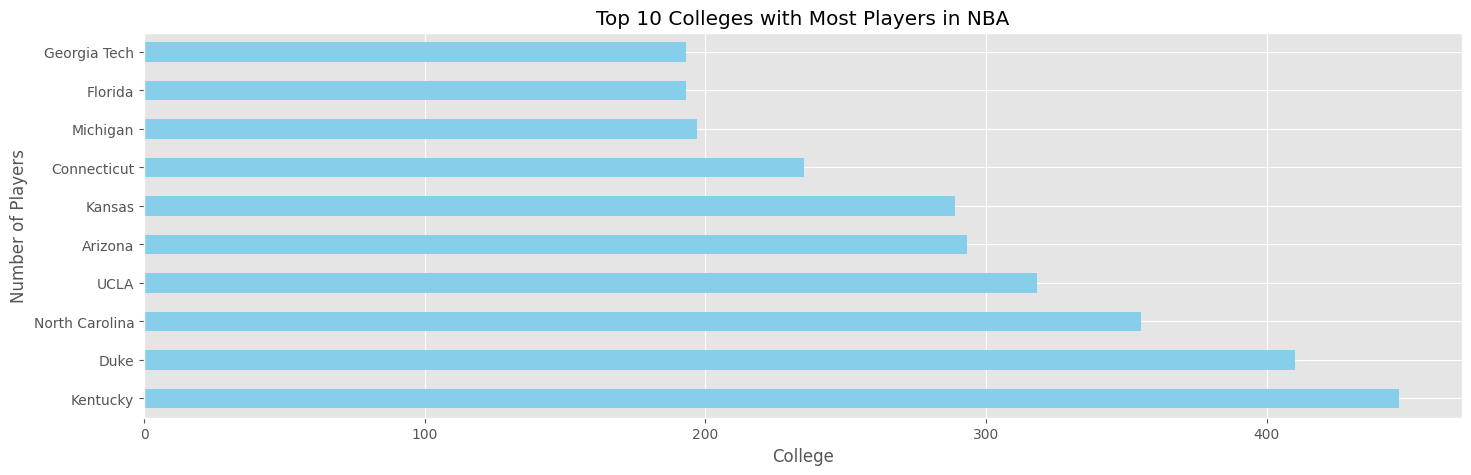

In [63]:
ax = df['college'].value_counts().head(10).plot(kind='barh', figsize=(17, 5), color='skyblue')

ax.set_xlabel('College')
ax.set_ylabel('Number of Players')
ax.set_title('Top 10 Colleges with Most Players in NBA')

plt.show()

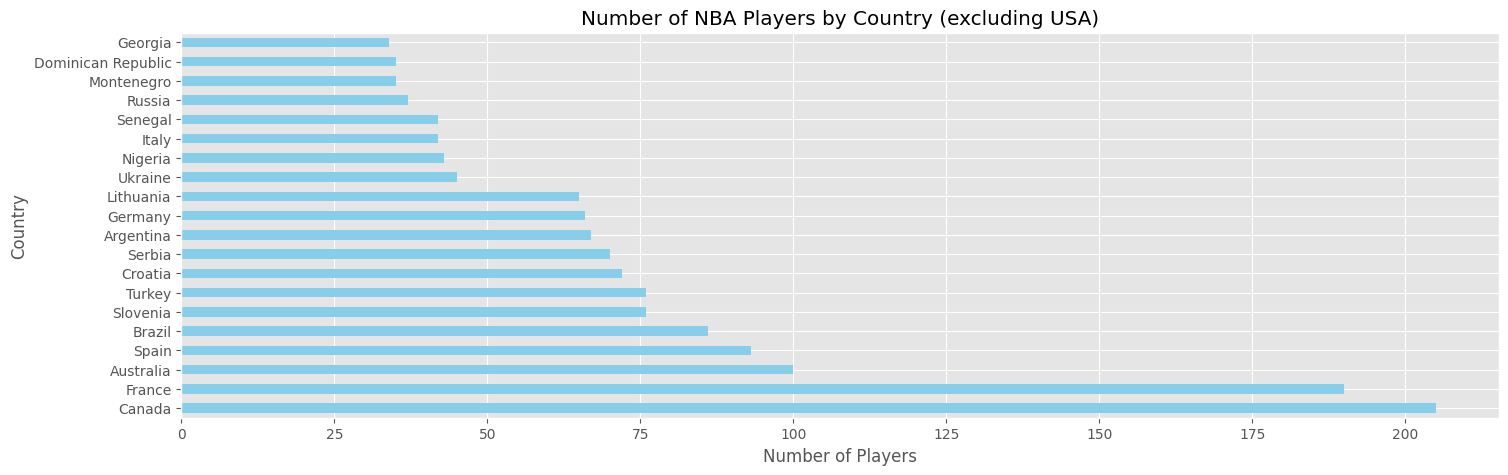

In [74]:
countries = df.query('country != "USA"')['country'].value_counts().head(20)

ax = countries.plot(kind='barh', figsize=(17, 5), color='skyblue')
ax.set_xlabel('Number of Players')
ax.set_ylabel('Country')
ax.set_title('Number of NBA Players by Country (excluding USA)')

plt.show()

### Step 4: Feature Relationships

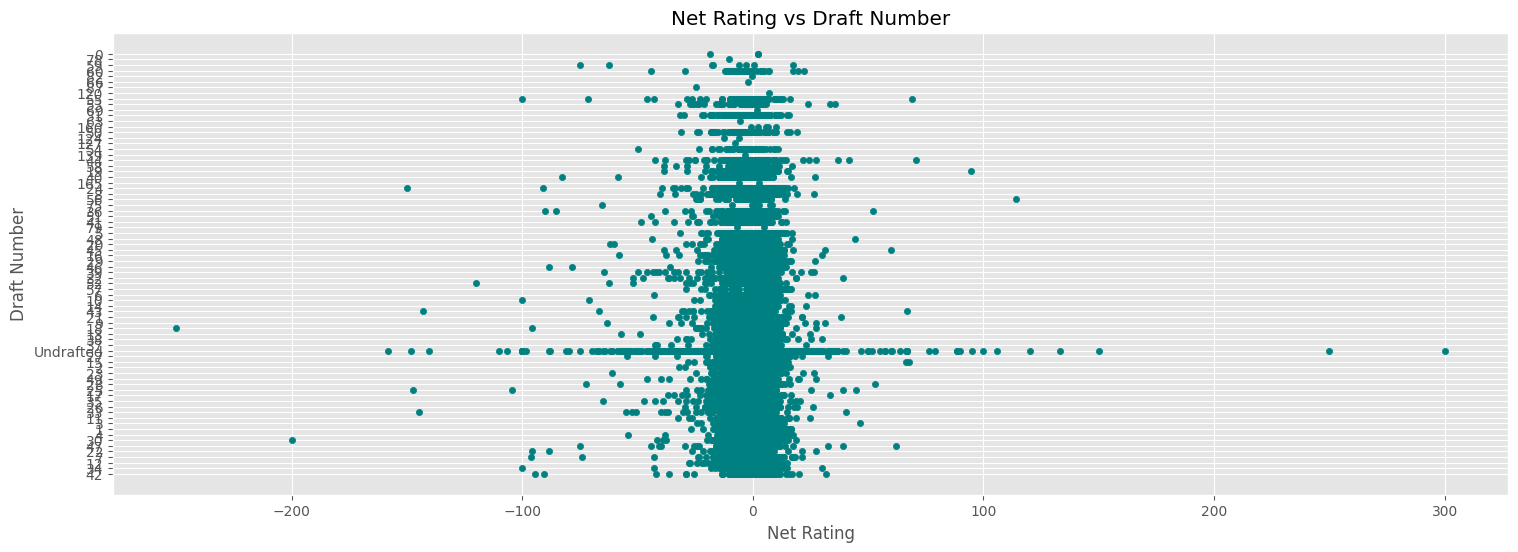

In [92]:
ax = df.plot(kind = 'scatter', x = 'net_rating', y = 'draft_number', color = 'teal', figsize=(18, 6))

ax.set_xlabel('Net Rating')
ax.set_ylabel('Draft Number')
ax.set_title('Net Rating vs Draft Number')

plt.show()

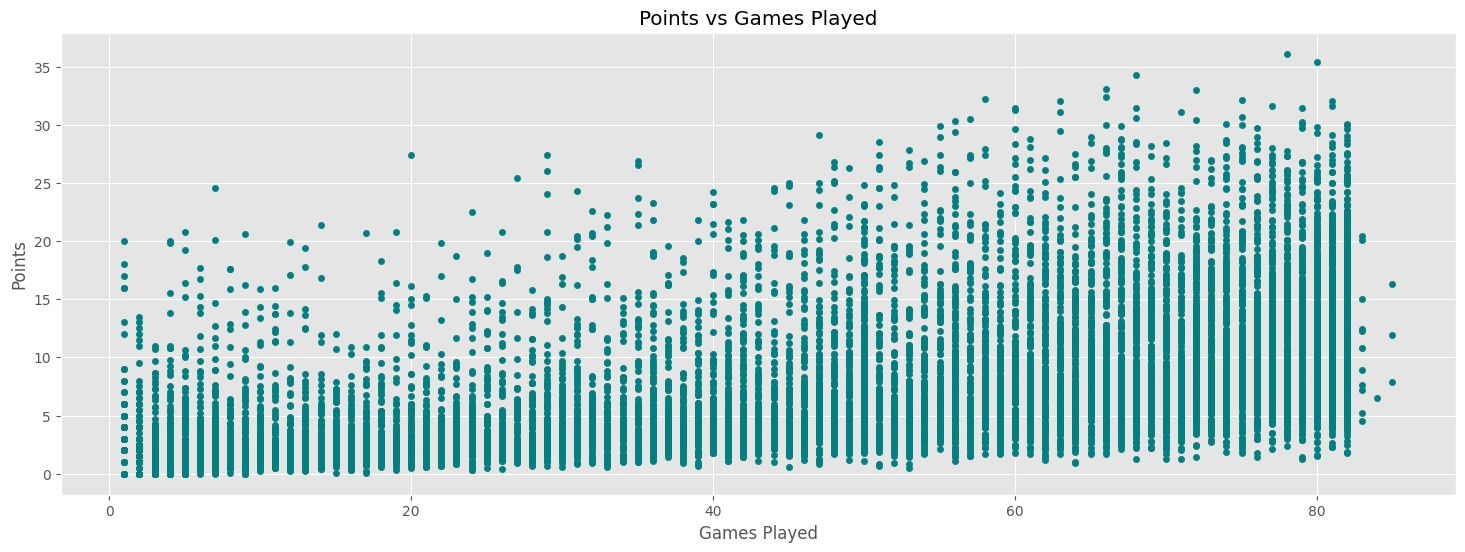

In [93]:
ax = df.plot(kind = 'scatter', x = 'gp', y = 'pts', color = 'teal', figsize=(18, 6))

ax.set_xlabel('Games Played')
ax.set_ylabel('Points')
ax.set_title('Points vs Games Played')

plt.show()

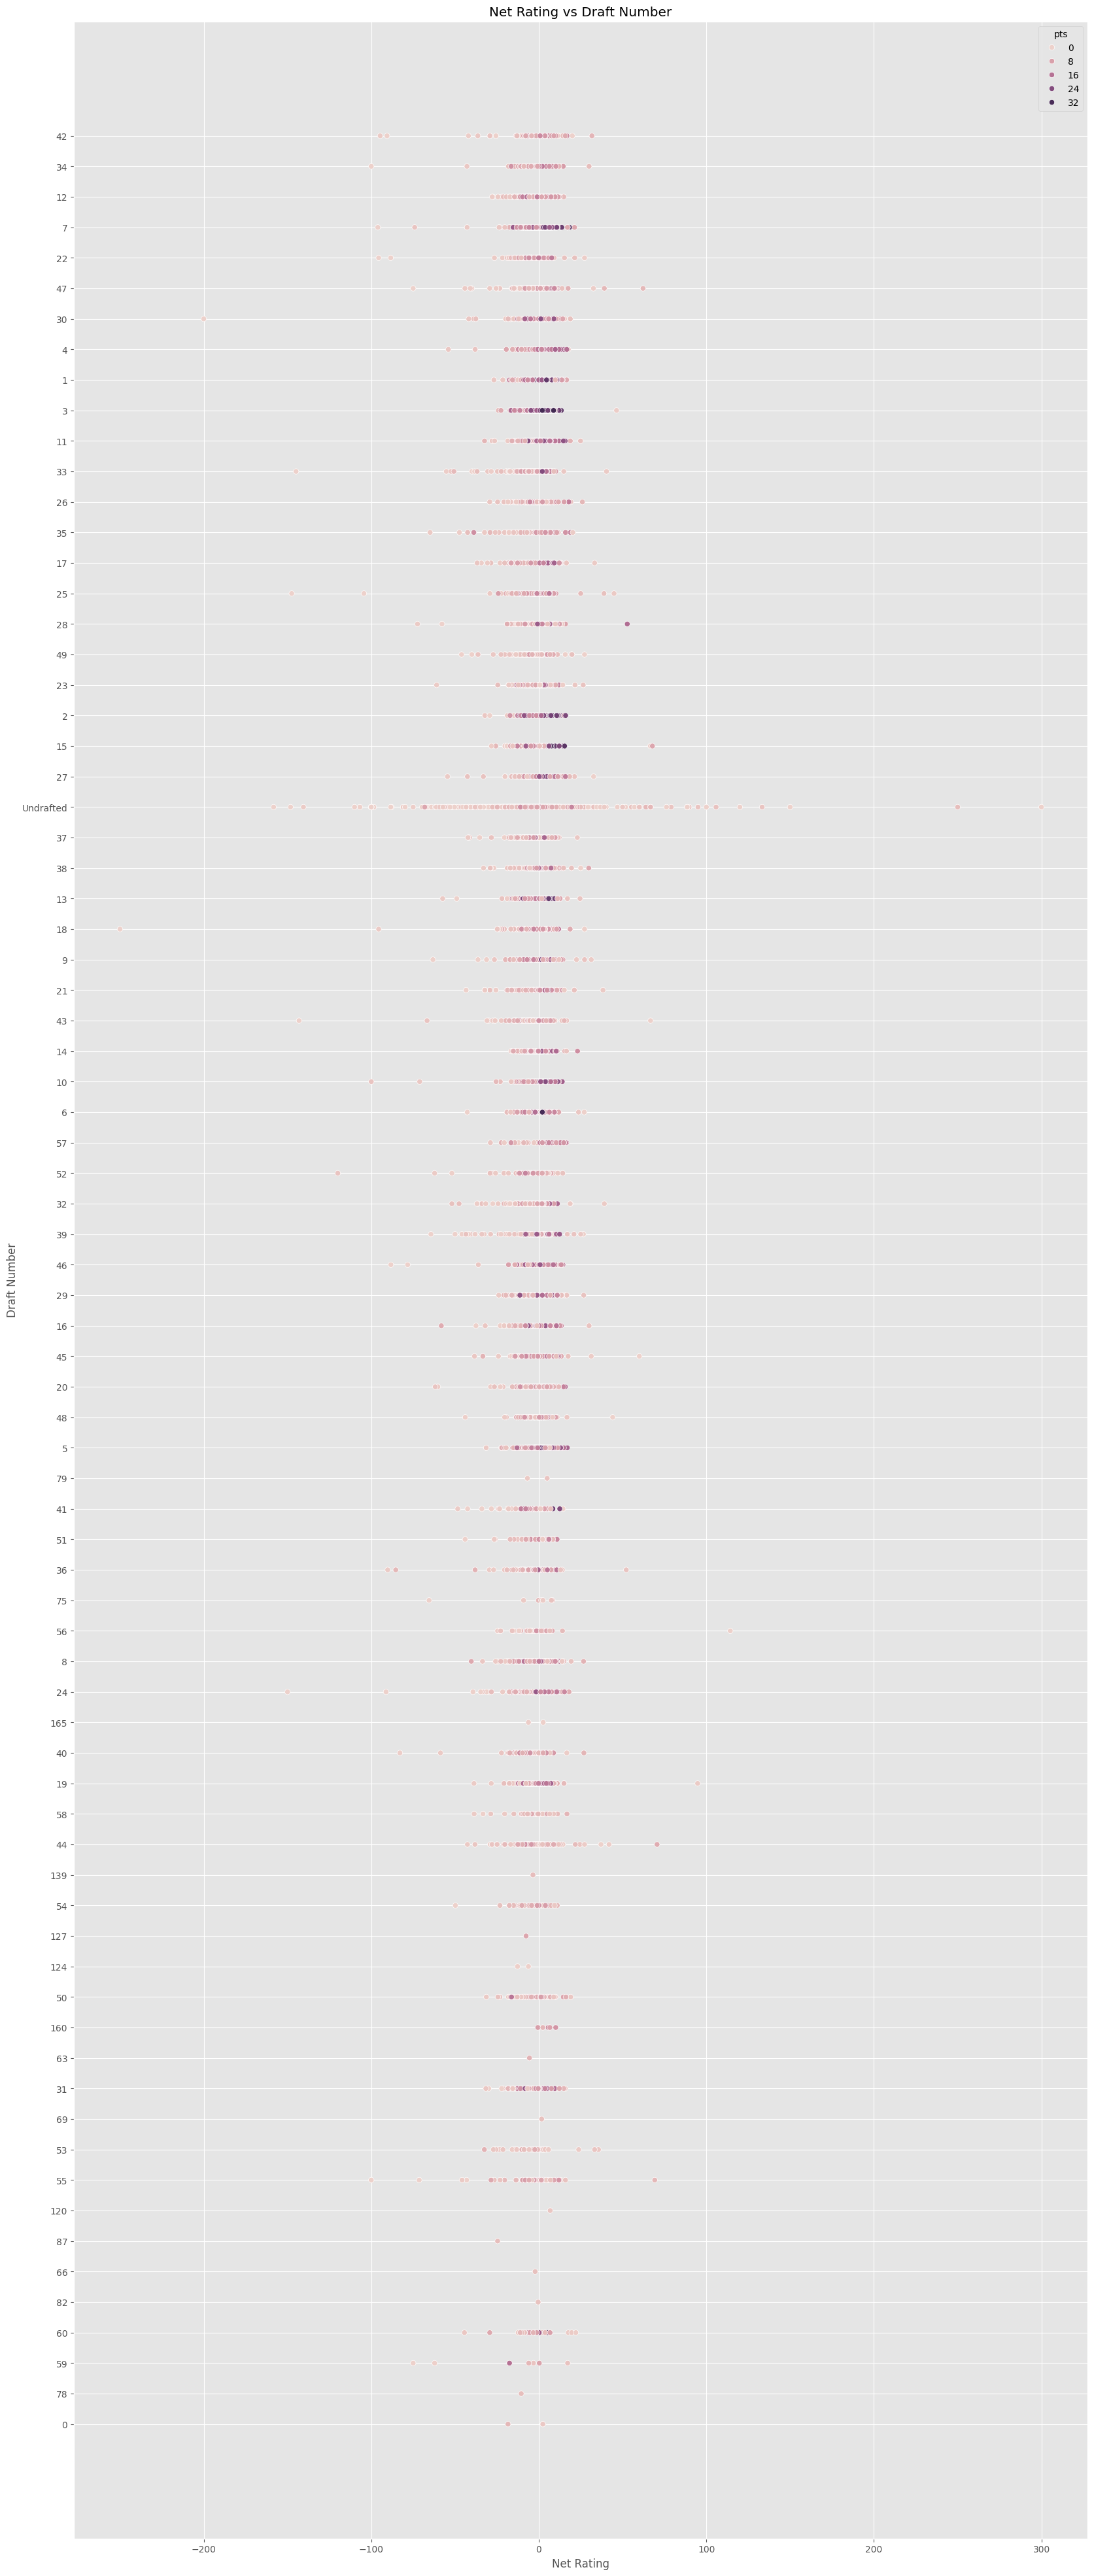

In [99]:
plt.figure(figsize=(20,50))
ax = sns.scatterplot(x='net_rating', y='draft_number', hue='pts', data=df)

ax.set_xlabel('Net Rating')
ax.set_ylabel('Draft Number')
ax.set_title('Net Rating vs Draft Number')

plt.show()

Text(0.5, 1.0, 'Number of Players by Draft Round')

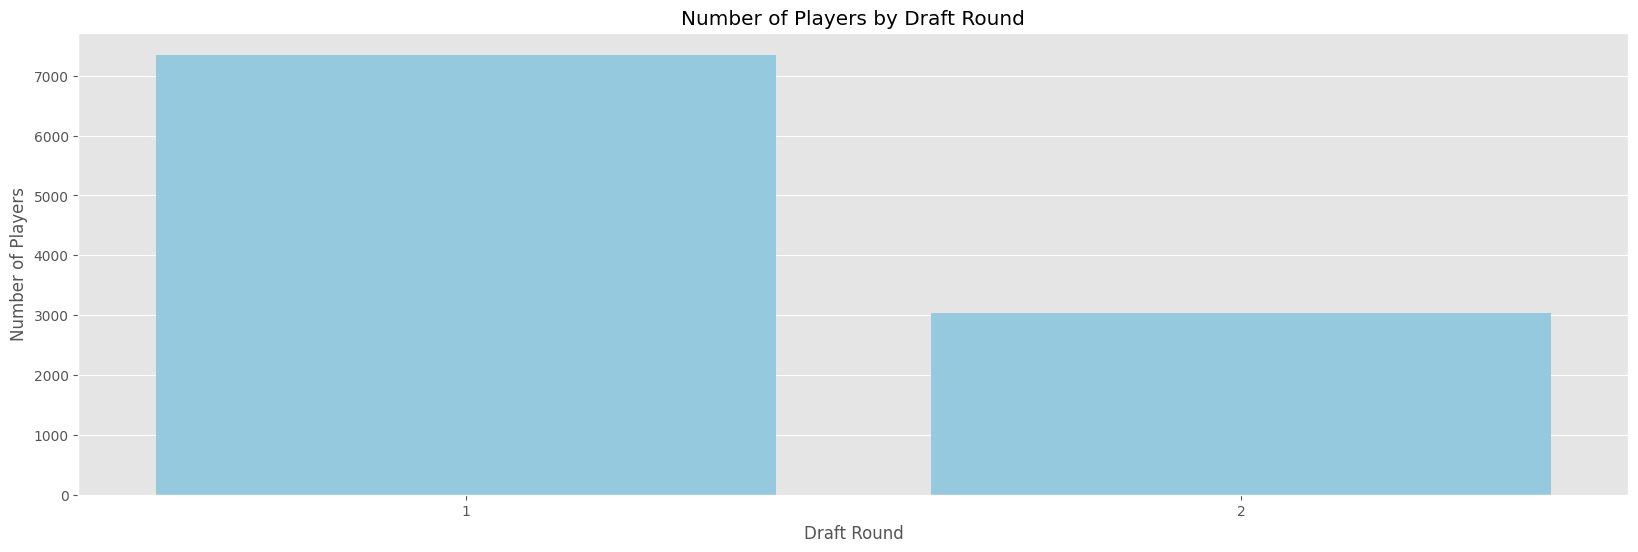

In [143]:
first_round = df.query('draft_round == "1"').shape[0]
second_round = df.query('draft_round == "2"').shape[0]

plt.figure(figsize=(20, 6))
rounds = sns.barplot(x=[1, 2], y=[first_round, second_round], color='skyblue')
rounds.set_xlabel('Draft Round')
rounds.set_ylabel('Number of Players')
rounds.set_title('Number of Players by Draft Round')

<Figure size 10000x5000 with 0 Axes>

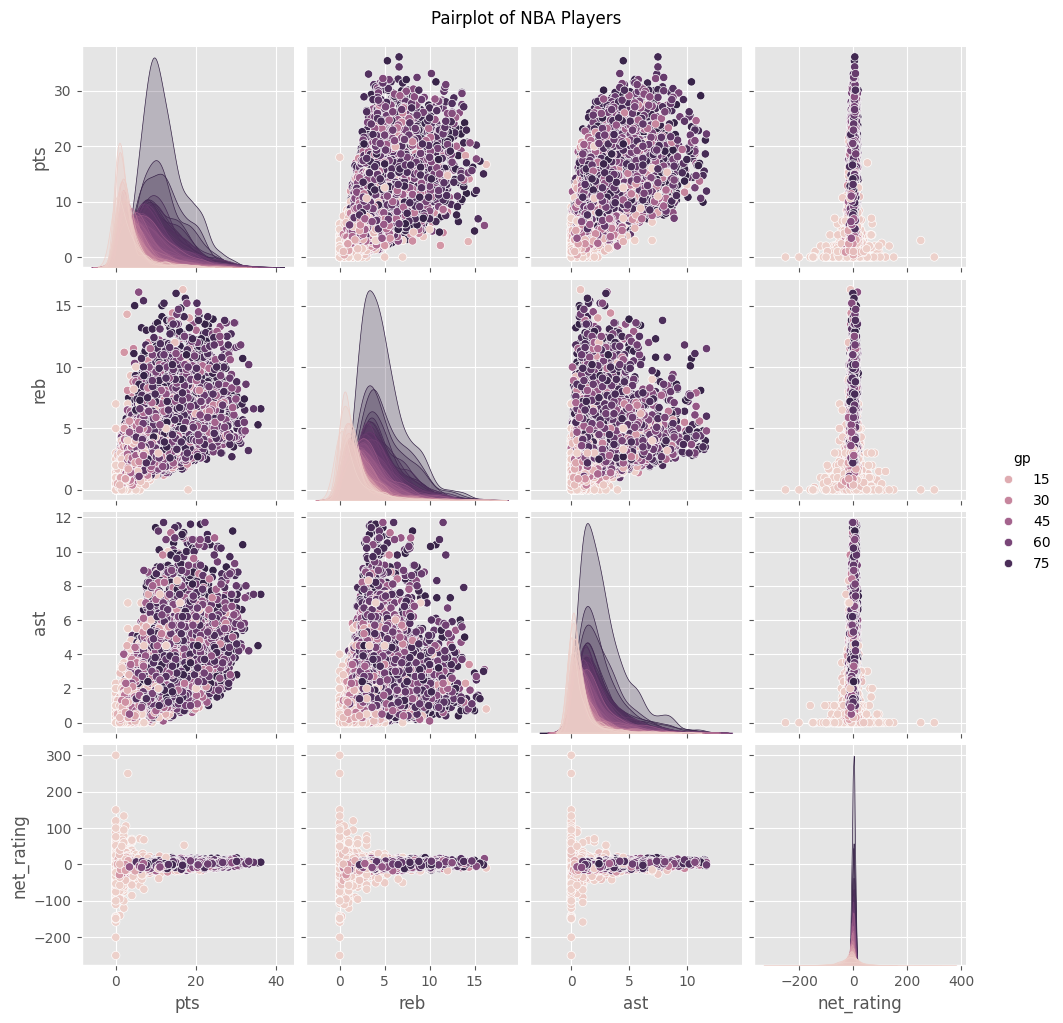

In [106]:
plt.figure(figsize=(100,50))
ax = sns.pairplot(df[['gp', 'pts', 'reb', 'ast', 'net_rating', 'draft_number']], hue='gp')
plt.suptitle('Pairplot of NBA Players', y=1.02)

plt.show()

In [112]:
df_correlations = df[['gp', 'pts', 'reb', 'ast', 'net_rating']].corr()
df_correlations

,gp,pts,reb,ast,net_rating
gp,1.000000,0.536003,0.471405,0.382726,0.248412
pts,0.536003,1.000000,0.624509,0.664320,0.215199
reb,0.471405,0.624509,1.000000,0.247841,0.187820
ast,0.382726,0.664320,0.247841,1.000000,0.162865
net_rating,0.248412,0.215199,0.187820,0.162865,1.000000


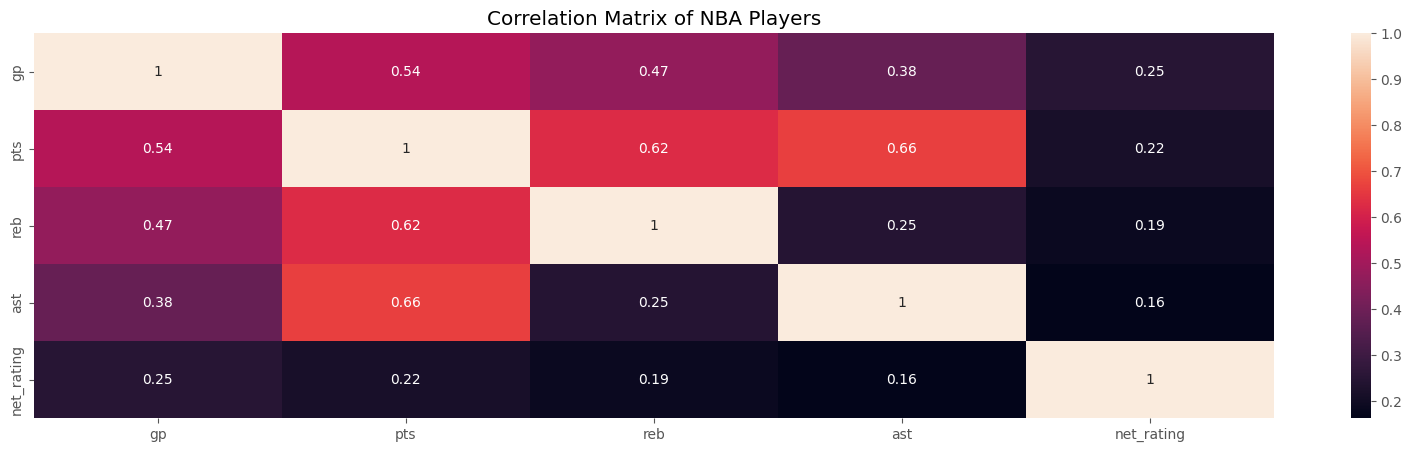

In [116]:
plt.figure(figsize=(20, 5))
ax = sns.heatmap(df_correlations, annot=True)

ax.set_title('Correlation Matrix of NBA Players')

plt.show()

### Step 5: Ask a Questions About Datas

- What is the average age of the players in the dataset?
- What is the average points scored by players who were undrafted?
- How many players were drafted in the first round and second round separately?
- What is the correlation between points (pts) and games played (gp)?
- Which team has the most drafted players in the dataset?
- What is the distribution of player heights in the dataset?
- How many players have a net rating greater than 5?
- What is the total number of games played by all players combined?
- How many players have played more than 30 games?
- What is the average net rating of players drafted in the first round?
- What is the average net rating of players who played more than 50 games?
- How many players have a net rating less than -5?
- What is the average points scored by players from the top 5 countries with the most players?
- What is the correlation between player height and points scored?
- What is the distribution of player weights in the dataset?
- How many players have a draft number less than 10?
- What is the average age of players drafted in the second round?

In [ ]:
## What is the average age of the players in the dataset?
mean_age = df['age'].mean()
print(f'The average age of NBA players is {mean_age:.2f} years old.')

The average age of NBA players is 27.05 years old.


In [123]:
## What is the average points scored by players who were undrafted?
mean_average_points_undrafted = df.query('draft_number == 0')['pts'].mean()
print(f'The average points scored by undrafted players is {mean_average_points_undrafted:.2f}.')

The average points scored by undrafted players is nan.


In [ ]:
## How many players were drafted in the first round and second round seperatly?
first_round = df.query('draft_round == "1"').shape[0]
second_round = df.query('draft_round == "2"').shape[0]

print(f'The number of players drafted in the first round is {first_round}.')
print(f'The number of players drafted in the second round is {second_round}.')



The number of players drafted in the first round is 7351.
The number of players drafted in the second round is 3032.


<Axes: >

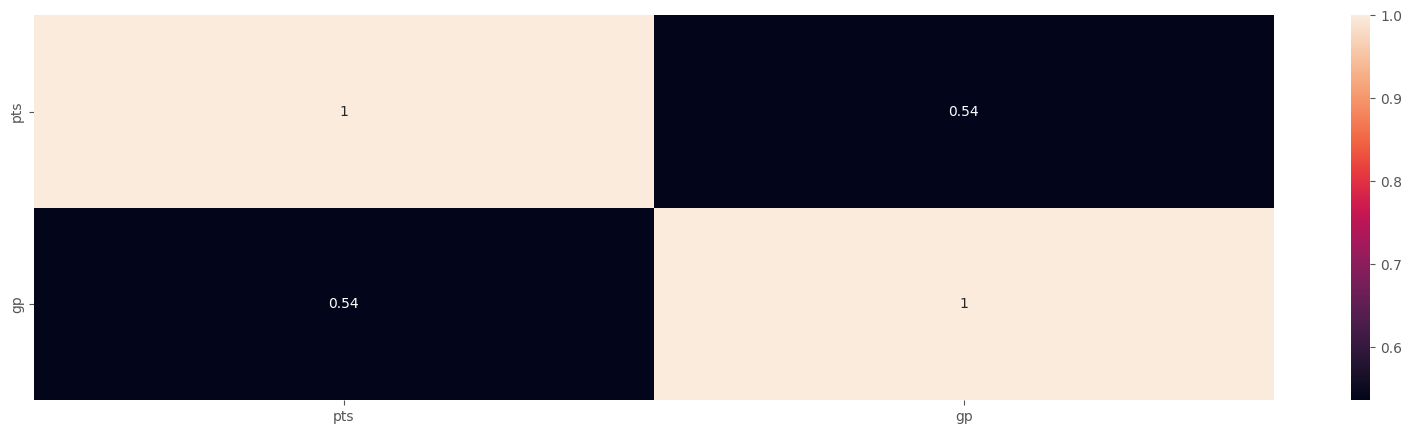

In [158]:
## What is the correlation between points (pts) and games played (gp)?

corr = df[['pts', 'gp']].corr()

plt.figure(figsize=(20,5))
sns.heatmap(corr, annot= True)

In [170]:
## Which team has the most drafted players in the dataset?

max = df['selected_team'].value_counts().idxmax()
print(f'The team with the most drafted players is {max}.')


The team with the most drafted players is CLE.


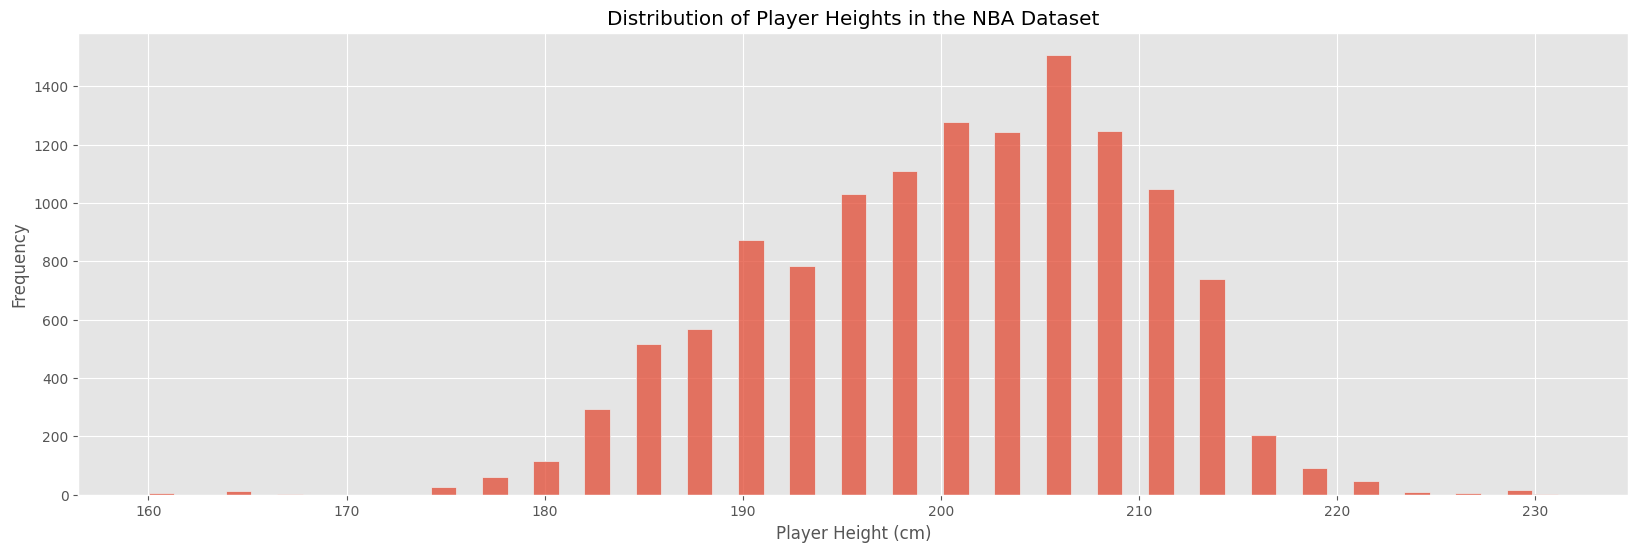

In [174]:
## What is the distribution of player heights in the dataset?
plt.figure(figsize=(20, 6))
sns.histplot(df['player_height'])
plt.xlabel('Player Height (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Player Heights in the NBA Dataset')
plt.show()

In [ ]:
## How many players have a net rating greater than 5?

df.query('net_rating > 5').shape[0]

2229

In [183]:
## What is the total number of games played by all players combined?
sum = df['gp'].sum()
sum

np.int64(657024)

In [188]:
## How many players have played more than 30 games?

df.query('gp > 30').shape[0]


9702

In [196]:
## What is the average net rating of players drafted in the first round?

df.query('draft_round == "1"')['net_rating'].mean()


np.float64(-1.242375187049381)

In [ ]:
## What is the average net rating of players who played more than 50 games?
df.query('gp > 50')['net_rating'].mean()

np.float64(-0.03776789324706833)

In [ ]:
## How many players have a net rating less than -5?
df.query('net_rating < -5').shape[0]

3945

In [226]:
## What is the average points scored by players from the top 5 countries with the most players?

df[df['country'].isin(top_5_countries)]['pts'].mean()

np.float64(8.220107878680698)

np.float64(8.220107878680698)

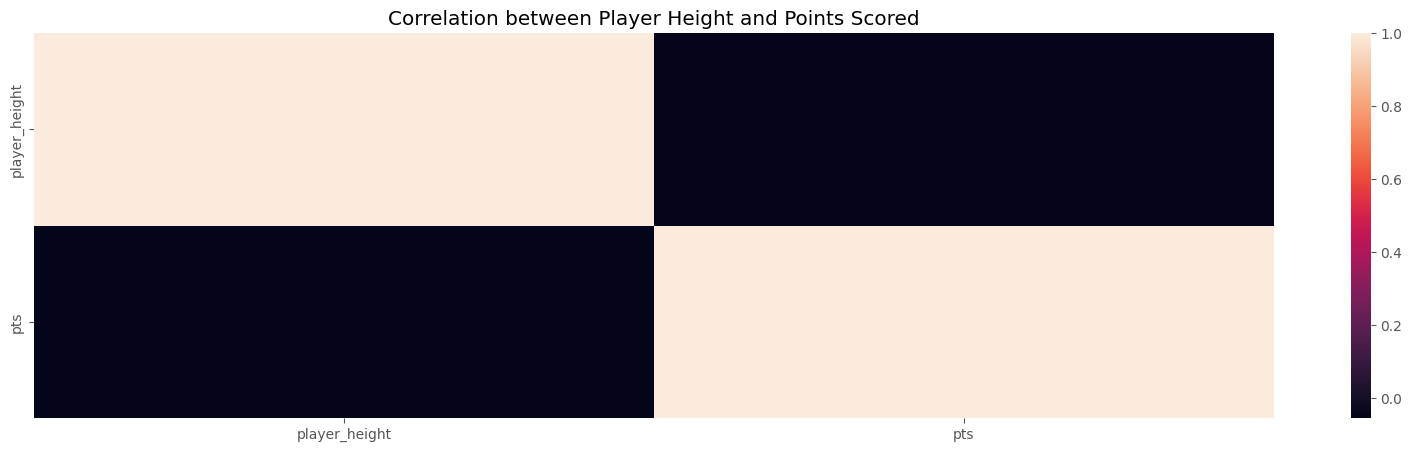

In [232]:
## What is the correlation between player height and points scored?
corr = df[['player_height', 'pts']].corr()

plt.figure(figsize=(20,5))
ax = sns.heatmap(corr)
ax = ax.set_title('Correlation between Player Height and Points Scored')

Text(0, 0.5, 'Frequency')

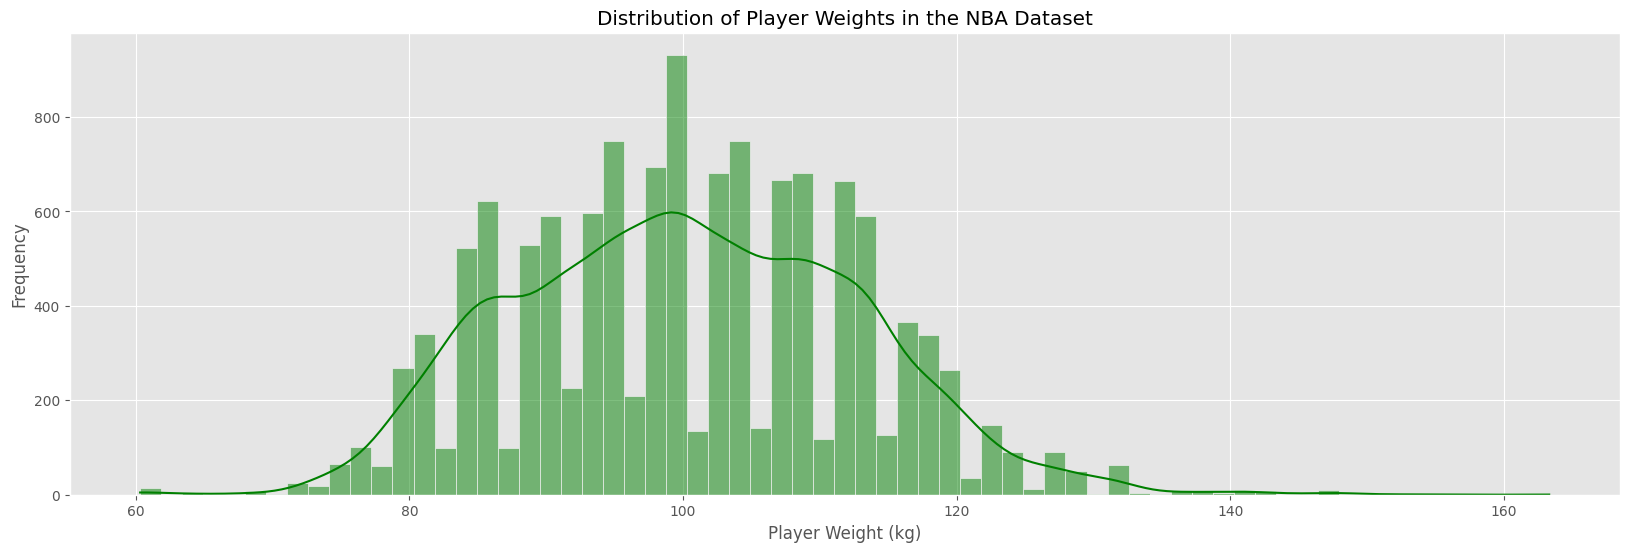

In [245]:
## What is the distribution of player weights in the dataset?

plt.figure(figsize=(20,6))
ax = sns.histplot(df['player_weight'], kde = True, color= 'green')
ax.title.set_text('Distribution of Player Weights in the NBA Dataset')
ax.set_xlabel('Player Weight (kg)')
ax.set_ylabel('Frequency')


In [247]:
## How many players have a draft number less than 10?
df.query('draft_number < "10"').shape[0]

364

In [249]:
## What is the average age of players drafted in the second round?
df.query('draft_round == "2"')['age'].mean()

np.float64(26.7434036939314)